# Generate Geometry

## Weird Geometry Generation using nanomesh

In [29]:
from skimage.morphology import disk
from nanomesh.data import binary_blobs2d

# Data must be normalized before using it in FEM
data = binary_blobs2d(length=100, volume_fraction=0.4)

from nanomesh import Mesher

mesher = Mesher(data)
mesher.generate_contour(max_edge_dist=10, precision=1)

# help(mesher)
# print(mesher.contour.__dict__)
# for polyg in mesher.polygons:
    # print(polyg)

# print(mesher.contour.points)
# print(mesher.contour.cells)
# print(mesher.contour.fields)
# print(mesher.contour.default_key)
# print(mesher.contour.cell_data['segment_markers'])

[1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 4 4 4 5 5 5 5 5 5 5 6 7 8 9]


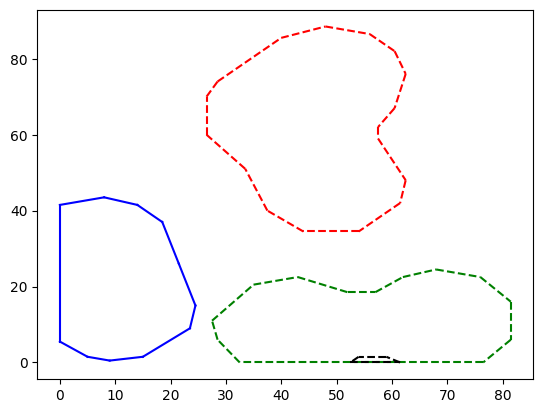

In [30]:
import matplotlib.pyplot as plt
points = mesher.contour.points
markers = mesher.contour.cell_data['segment_markers']
print(markers)
for k,(i,j) in enumerate(mesher.contour.cells):
    if markers[k] == 1:
        plt.plot(points[[i,j],0], points[[i,j],1],'b')
    elif markers[k] == 2:
        plt.plot(points[[i,j],0], points[[i,j],1],'r--')
    elif markers[k] == 3:
        plt.plot(points[[i,j],0], points[[i,j],1],'g--')
    elif markers[k] == 4:
        plt.plot(points[[i,j],0], points[[i,j],1],'k--')

<Axes: title={'center': 'triangle mesh'}>

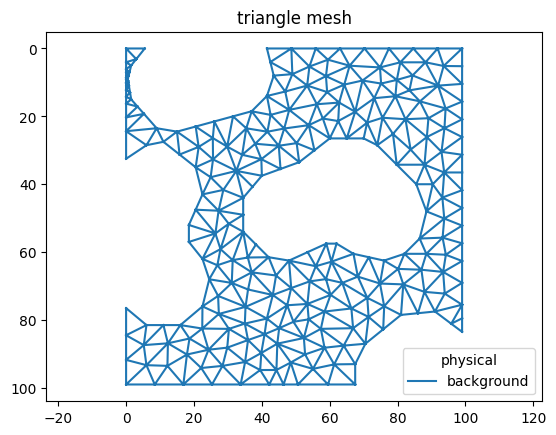

In [41]:
mesh = mesher.triangulate(opts='q30a25')

triangles = mesh.get('triangle')
triangles.remove_cells(label=2, key='physical')

triangles.plot()
# triangles.write('mesh1.vol', 'netgen')

In [42]:
# !pip install trimesh
triangles = mesh.get('triangle')
triangles.remove_cells(label=2, key='physical')
pv_mesh = triangles.to_pyvista_unstructured_grid()
trimesh_mesh = triangles.to_trimesh()
meshio_mesh = triangles.to_meshio()

In [43]:
meshio_mesh.write('out.msh', file_format='gmsh22', binary=False)
meshio_mesh.write('out.vol', file_format='netgen')

Warning: Appending zeros to replace the missing physical tag data.

Warning: Appending zeros to replace the missing geometrical tag data.

In [46]:
from ngsolve import *
from ngsolve.webgui import Draw

ngsolvemesh = Mesh('out.vol')
print(ngsolvemesh.GetMaterials())
print(ngsolvemesh.GetBoundaries())
Draw(ngsolvemesh)

('default',)
()


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [6]:
print(triangles.cells)

[[138  18 132]
 [ 94  97  93]
 [139 123 135]
 ...
 [259 294 260]
 [ 12  54 293]
 [269 294 262]]


In [7]:
help(triangles)

Help on TriangleMesh in module nanomesh.mesh._triangle object:

class TriangleMesh(nanomesh.mesh._mesh.Mesh, nanomesh.mesh._mixin.PruneZ0Mixin)
 |  TriangleMesh(points: 'np.ndarray', cells: 'np.ndarray', *args, **kwargs)
 |  
 |  Data class for triangle meshes.
 |  
 |  Depending on the number of dimensions of the cells, the appropriate
 |  subclass will be chosen if possible.
 |  
 |  Parameters
 |  ----------
 |  points : (m, 2 or 3) numpy.ndarray[float]
 |      Array with points.
 |  cells : (i, 3) numpy.ndarray[int]
 |      Index array describing the cells of the mesh.
 |  fields : Dict[str, int]:
 |      Mapping from field names to labels
 |  region_markers : RegionMarkerList, optional
 |      List of region markers used for assigning labels to regions.
 |      Defaults to an empty list.
 |  **cell_data
 |      Additional cell data. Argument must be a 1D numpy array
 |      matching the number of cells defined by `i`.
 |  
 |  Method resolution order:
 |      TriangleMesh
 |      

In [8]:
help(mesh)

Help on MeshContainer in module nanomesh.mesh_container object:

class MeshContainer(meshio._mesh.Mesh, nanomesh.mesh._mixin.PruneZ0Mixin)
 |  MeshContainer(points: 'ArrayLike', cells: 'dict[str, ArrayLike] | list[tuple[str, ArrayLike] | CellBlock]', point_data: 'dict[str, ArrayLike] | None' = None, cell_data: 'dict[str, list[ArrayLike]] | None' = None, field_data=None, point_sets: 'dict[str, ArrayLike] | None' = None, cell_sets: 'dict[str, list[ArrayLike]] | None' = None, gmsh_periodic=None, info=None)
 |  
 |  Low-level container for storing mesh data.
 |  
 |  Can contain multiple cell types sharing a set of points.
 |  It can store different types of cells and associated data.
 |  :class:`MeshContainer` is based on :class:`meshio.Mesh`
 |  (https://github.com/nschloe/meshio).
 |  
 |  Parameters
 |  ----------
 |  points : numpy.ndarray
 |      Array storing the mesh points (e.g. vertices)
 |  cells : list
 |      List of cell arrays
 |  point_data : todo
 |  cell_data : todo
 |  f

In [18]:
meshiomesh = triangles.to_meshio()

In [19]:
help(meshiomesh)

Help on Mesh in module meshio._mesh object:

class Mesh(builtins.object)
 |  Mesh(points: 'ArrayLike', cells: 'dict[str, ArrayLike] | list[tuple[str, ArrayLike] | CellBlock]', point_data: 'dict[str, ArrayLike] | None' = None, cell_data: 'dict[str, list[ArrayLike]] | None' = None, field_data=None, point_sets: 'dict[str, ArrayLike] | None' = None, cell_sets: 'dict[str, list[ArrayLike]] | None' = None, gmsh_periodic=None, info=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, points: 'ArrayLike', cells: 'dict[str, ArrayLike] | list[tuple[str, ArrayLike] | CellBlock]', point_data: 'dict[str, ArrayLike] | None' = None, cell_data: 'dict[str, list[ArrayLike]] | None' = None, field_data=None, point_sets: 'dict[str, ArrayLike] | None' = None, cell_sets: 'dict[str, list[ArrayLike]] | None' = None, gmsh_periodic=None, info=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  cell_data_to_sets(self, key:

In [20]:
meshiomesh.__dict__

{'points': array([[59.5       , 99.        ],
        [63.5       , 92.        ],
        [63.5       , 85.        ],
        [58.5       , 74.        ],
        [55.        , 70.5       ],
        [48.        , 67.5       ],
        [36.        , 68.5       ],
        [33.5       , 67.        ],
        [28.        , 55.5       ],
        [23.        , 52.5       ],
        [15.        , 52.5       ],
        [ 7.5       , 59.        ],
        [ 6.5       , 69.        ],
        [ 9.5       , 74.        ],
        [18.5       , 81.        ],
        [22.5       , 93.        ],
        [33.5       , 99.        ],
        [33.5       ,  0.        ],
        [33.5       ,  7.        ],
        [36.5       , 12.        ],
        [42.        , 15.5       ],
        [47.        , 16.5       ],
        [49.5       , 19.        ],
        [48.5       , 32.        ],
        [54.5       , 41.        ],
        [54.5       , 49.        ],
        [57.5       , 59.        ],
        [64.      

## Translate to FEMSolver

In [1]:
# import netgen.gui
from ngsolve import Mesh
from ngsolve.webgui import Draw
from netgen.geom2d import SplineGeometry

In [5]:
geo = SplineGeometry()

pnts =[(0,0),
       (1,0),
       (1,1),
       (0,1)]

p1,p2,p3,p4 = [geo.AppendPoint(*pnt) for pnt in pnts]
# curves = [[["line",p1,p2], leftdomain=1, rightdomain=0,bc="square"],
#           [["line",p2,p3], leftdomain=1, rightdomain=0,bc="square"],
#           [["line",p3,p4], leftdomain=1, rightdomain=0,bc="square"],
#           [["line",p4,p1], leftdomain=1, rightdomain=0,bc="square"]]

geo.Append(["line",p1,p2], leftdomain=1, rightdomain=0,bc="square")
geo.Append(["line",p2,p3], leftdomain=1, rightdomain=0,bc="square")
geo.Append(["line",p3,p4], leftdomain=1, rightdomain=0,bc="square")
geo.Append(["line",p4,p1], leftdomain=1, rightdomain=0,bc="square")

pntsT = [ (0.25,0.25), (0.5,0.25), (0.375,0.5)]

q1,q2,q3 = [geo.AppendPoint(*pnt) for pnt in pntsT]
geo.Append(["line",q1,q2], leftdomain=0, rightdomain=1,bc="triangle")
geo.Append(["line",q2,q3], leftdomain=0, rightdomain=1,bc="triangle")
geo.Append(["line",q3,q1], leftdomain=0, rightdomain=1,bc="triangle")


pntsR = [ (0.6,0.5), (0.9,0.5), (0.75,0.8)]

r1,r2,r3 = [geo.AppendPoint(*pnt) for pnt in pntsR]
geo.Append(["line",r1,r2], leftdomain=0, rightdomain=1,bc="triangle")
geo.Append(["line",r2,r3], leftdomain=0, rightdomain=1,bc="triangle")
geo.Append(["line",r3,r1], leftdomain=0, rightdomain=1,bc="triangle")
# curvesT = [[["line",q1,q2],"triangle"],
#           [["line",q2,q3],"triangle"],
#           [["line",q3,q1],"triangle"]]

# [geo.Append(c,bc=bc) for c,bc in curves]
# [geo.Append(c,bc=bc) for c,bc in curvesT]

ngmesh = geo.GenerateMesh(maxh=0.2)
Draw (Mesh(ngmesh))

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [2]:
geo = SplineGeometry()
pnts =[(0,0),(100,0),(100,100),(0,100)]
sqpnts = [geo.AppendPoint(*pnt) for pnt in pnts]
prev_pnt = sqpnts[-1]
for pnt in sqpnts:
    geo.Append(["line", prev_pnt, pnt], leftdomain=1, rightdomain=0,bc="square")
    prev_pnt = pnt


pntsT = [ (25,25), (50,25), (37.5,50)]
Tpnts = [geo.AppendPoint(*pnt) for pnt in pntsT]
prev_pnt = Tpnts[-1]
for pnt in Tpnts:
    geo.Append(["line", prev_pnt, pnt], leftdomain=0, rightdomain=1,bc="triangle1")
    prev_pnt = pnt
    
pntsR = [ (60,50), (90,50), (75,80)]
Rpnts = [geo.AppendPoint(*pnt) for pnt in pntsR]
prev_pnt = Rpnts[-1]
for pnt in Rpnts:
    geo.Append(["line", prev_pnt, pnt], leftdomain=0, rightdomain=1,bc="triangle2")
    prev_pnt = pnt

ngmesh = geo.GenerateMesh(maxh=20)
Draw (Mesh(ngmesh))

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [13]:
geo = SplineGeometry()
pnts =[(-1,-1),(100,-1),(100,100),(-1,100)]
sqpnts = [geo.AppendPoint(*pnt) for pnt in pnts]
prev_pnt = sqpnts[-1]
for pnt in sqpnts:
    geo.Append(["line", prev_pnt, pnt], leftdomain=1, rightdomain=0,bc="square")
    prev_pnt = pnt

pnts_1 = [( 0. , 26.5),( 9. , 22.5),(15.5, 15. ),(17.5,  8. ),(16.5,  0. ),( 0. ,  0. )]

curve_pnts_1 = [geo.AppendPoint(*pnt) for pnt in pnts_1]
prev_pnt1 = curve_pnts_1[-1]
for pnt1 in curve_pnts_1:
    geo.Append(["line", prev_pnt1, pnt1], leftdomain=1, rightdomain=0, bc="curve1")
    prev_pnt1 = pnt1


ngmesh = geo.GenerateMesh(maxh=10)
Draw (Mesh(ngmesh))


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [7]:
pnts1=[[23.5, 99. ],
       [36. , 92.5],
       [40.5, 88. ],
       [43.5, 81. ],
       [42.5, 74. ],
       [35.5, 64. ],
       [39.5, 53. ],
       [38.5, 46. ],
       [31.5, 36. ],
       [23. , 27.5],
       [16. , 24.5],
       [12. , 24.5],
       [ 4. , 28.5],
       [ 0. , 36.5],
       [ 0. , 99. ]]
pnts2=[[ 0. , 41.5],
       [ 2.5, 48. ],
       [14.5, 62. ],
       [14.5, 65. ],
       [ 0. , 78.5]]

geo = SplineGeometry()
pnts =[(-2,-2),(102,-2),(102,102),(-2,102)]
sqpnts = [geo.AppendPoint(*pnt) for pnt in pnts]
prev_pnt = sqpnts[-1]
for pnt in sqpnts:
    geo.Append(["line", prev_pnt, pnt], leftdomain=1, rightdomain=0,bc="square")
    prev_pnt = pnt

curve_pnts_1 = [geo.AppendPoint(*pnt) for pnt in pnts1]
prev_pnt1 = curve_pnts_1[-1]
for pnt1 in curve_pnts_1:
    geo.Append(["line", prev_pnt1, pnt1], leftdomain=1, rightdomain=0, bc="curve1")
    prev_pnt1 = pnt1



curve_pnts_2 = [geo.AppendPoint(*pnt) for pnt in pnts2]
prev_pnt2 = curve_pnts_2[-1]
for pnt2 in curve_pnts_2:
    geo.Append(["line", prev_pnt2, pnt2], leftdomain=2, rightdomain=0, bc="curve2")
    prev_pnt2 = pnt2

ngmesh = geo.GenerateMesh(maxh=10)
Draw (Mesh(ngmesh))


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [ ]:
ngmesh = geo.GenerateMesh(maxh=25)#,quad_dominated=True)
Draw (Mesh(ngmesh))

In [9]:
from ngsolve import *
from ngsolve.webgui import Draw

mesh = Mesh('mesh1.vol')
Draw(mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [16]:
print(mesh.GetBBBoundaries())

()


In [17]:
mesh.ngmesh.SetBCName(0, "other_name")

In [18]:
print(mesh.GetBoundaries())

()


In [19]:
ngmesh = mesh.ngmesh